In [ ]:
!pip install pandas
!pip install scikit-learn
!pip install seaborn
!pip install umap-learn
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 42.1 MB/s eta 0:00:00


In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from cartopy.io.img_tiles import OSM
import os
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from umap import UMAP  # Assurez-vous d'avoir la bibliothèque umap-learn installée

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
directory = "/content/gdrive/MyDrive/Valeurs acoustiques/2022/Antras_Isard/"

In [ ]:
csv_file_path = os.path.join(directory, 'Antras_IsardSM4564_702L_BleuL_E_B_R_acoustic_indices.csv')

In [ ]:
df = pd.read_csv(csv_file_path)
df.head(2).T

,0,1
Unnamed: 0,0,1
file_name,SMA07113_20220531_174020.wav,SMA07113_20220531_181002.wav
station_name,2022/Antras_Isard/SM7113_235L_Rouge/Data/,2022/Antras_Isard/SM7113_235L_Rouge/Data/
ZCR,5592.433333,5985.0
MEANt,0.00108,-0.000182
...,...,...
AGI,8.184633,1.333257
ROItotal,24,229
ROIcover,14.223211,5.669586
dynamique,Rouge,Rouge


In [ ]:
df_fn_sn = df[['file_name', 'station_name']].copy()

df.drop(columns=["Unnamed: 0", "file_name", "station_name"], inplace= True)

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Instancier LabelEncoder
label_encoder = LabelEncoder()

# Initialiser un dictionnaire pour stocker les correspondances
label_mapping = {}

# Appliquer LabelEncoding aux colonnes qualitatives
qualitative_cols = ['dynamique', 'position']
for col in qualitative_cols:
    df[col] = label_encoder.fit_transform(df[col])
    # Stocker les correspondances dans le dictionnaire
    label_mapping[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Afficher le dictionnaire de correspondance
print("Dictionnaire de correspondance des labels :")
for col, mapping in label_mapping.items():
    print(f"{col}: {mapping}")

# Afficher le DataFrame après les modifications
print("\nDataFrame après les modifications :")
df.head(2).T

Dictionnaire de correspondance des labels :
dynamique: {'Bleu': 0, 'Rouge': 1}
position: {'E': 0, 'L': 1}

DataFrame après les modifications :


,0,1
ZCR,5592.433333,5985.000000
MEANt,0.001080,-0.000182
VARt,0.002056,0.000044
SKEWt,-7.353643,0.001908
KURTt,305.336397,3.024766
...,...,...
AGI,8.184633,1.333257
ROItotal,24.000000,229.000000
ROIcover,14.223211,5.669586
dynamique,1.000000,1.000000


In [ ]:
df_dy_po = df[['dynamique', 'position']].copy()

df_dy_po

,dynamique,position
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
800,0,1
801,0,1
802,0,1
803,0,1


In [ ]:
df.drop(columns=["dynamique", "position"], inplace= True)

In [ ]:
df

,ZCR,MEANt,VARt,SKEWt,KURTt,LEQt,BGNt,SNRt,MED,Ht,...,TFSD,H_Havrda,H_Renyi,H_pairedShannon,H_gamma,H_GiniSimpson,RAOQ,AGI,ROItotal,ROIcover
0,5592.433333,0.001080,0.002056,-7.353643,305.336397,66.152530,-33.730106,18.710289,0.020582,0.571475,...,0.735661,0.333250,4.149317,6.529009,54909.501459,0.991015,0.704957,8.184633,24,14.223211
1,5985.000000,-0.000182,0.000044,0.001908,3.024766,49.441233,-33.699547,0.184051,0.020655,0.995639,...,0.712636,0.333301,4.617483,6.098225,28705.436534,0.991606,0.850879,1.333257,229,5.669586
2,5557.816667,-0.000722,0.000051,-0.013470,6.052949,50.141978,-34.221490,1.425626,0.019450,0.964310,...,0.742322,0.333322,5.140832,6.532900,40612.981500,0.994956,0.757740,1.793992,206,13.571822
3,5238.666667,-0.000875,0.000041,0.000330,4.578263,49.182520,-34.435130,0.829582,0.018978,0.976875,...,0.716094,0.333316,4.935782,6.394927,38058.261018,0.993849,0.790670,1.587365,263,8.841069
4,4607.933333,-0.000830,0.000079,-0.068094,23.844919,52.040429,-35.056084,3.847526,0.017668,0.878895,...,0.734080,0.333326,5.342294,6.610268,42322.056588,0.995672,0.644016,2.390653,142,15.343391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,2.000000,-0.072317,0.000124,-0.035610,5.567326,70.307484,-19.778631,0.201912,0.102581,0.997218,...,0.708089,0.333280,4.365928,6.439928,53270.370433,0.991346,0.920998,1.326784,4,0.139970
801,0.000000,-0.072371,0.000046,-0.017380,3.615523,70.250082,-20.844028,0.115951,0.090740,0.999276,...,0.740693,0.333278,4.355209,6.210620,43825.765284,0.990017,0.640304,1.469113,27,8.410632
802,0.100000,-0.072422,0.000051,0.263268,8.672125,70.259886,-21.055277,0.190053,0.088560,0.998726,...,0.717544,0.332701,3.133926,5.252555,21031.368891,0.968973,0.237856,1.440826,24,6.119514
803,31.166667,-0.072483,0.000369,0.793969,42.538461,70.520535,-20.305517,1.280942,0.096544,0.975738,...,0.680942,0.330726,2.425401,4.476047,18111.192557,0.927638,0.284317,1.487400,7,0.902982


---

## Etude pour les NaN



In [ ]:
# Vérifier si merged_df contient des valeurs NaN
if df.isna().any().any():
    print("Le DataFrame contient des valeurs NaN.")
else:
    print("Le DataFrame ne contient pas de valeurs NaN.")

Le DataFrame contient des valeurs NaN.


In [ ]:
# Localiser les valeurs NaN dans merged_df
nan_locations = df.isna()

# Afficher les positions des valeurs NaN
print("Positions des valeurs NaN :")
print(nan_locations)

# Afficher les lignes contenant des valeurs NaN
nan_rows = df[nan_locations.any(axis=1)]
print("\nLignes contenant des valeurs NaN :")
nan_rows

Positions des valeurs NaN :
       ZCR  MEANt   VARt  SKEWt  KURTt   LEQt   BGNt   SNRt    MED     Ht  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
800  False  False  False  False  False  False  False  False  False  False   
801  False  False  False  False  False  False  False  False  False  False   
802  False  False  False  False  False  False  False  False  False  False   
803  False  False  False  False  False  False  False  False  False  False   
804  False  False  False  False  False  False  False  False  False  False   

     ...   TFSD  H_Havrda  H_Renyi  H_pairedSha

,ZCR,MEANt,VARt,SKEWt,KURTt,LEQt,BGNt,SNRt,MED,Ht,...,TFSD,H_Havrda,H_Renyi,H_pairedShannon,H_gamma,H_GiniSimpson,RAOQ,AGI,ROItotal,ROIcover
335,0.000000,-0.081281,0.000119,-0.000262,3.431462,71.297975,-19.063114,0.064509,0.111390,0.999008,...,0.757777,0.333151,3.755185,5.378313,15084.407178,0.980567,0.804821,1.373438,198,1.131124
336,0.000000,-0.081464,0.000147,-0.017541,4.496346,71.335340,-18.922922,0.179048,0.113202,0.997507,...,0.758713,0.333131,3.704104,5.272573,13144.139732,0.979120,0.601822,1.343671,170,1.927486
337,0.066667,-0.081729,0.000214,-0.020892,3.886323,71.405144,-18.286020,0.066512,0.121814,0.997628,...,0.757598,0.333047,3.529341,5.042789,10333.508595,0.974330,0.356785,1.369507,138,1.776156
339,0.000000,-0.082422,0.000162,-0.002591,3.641950,71.443577,-18.570919,0.057617,0.117884,0.998453,...,0.763048,0.333104,3.641874,5.279796,13782.524118,0.978432,0.530069,1.407872,136,0.997303
340,0.000000,-0.081963,0.000141,-0.005832,3.891535,71.383481,-18.776300,0.049321,0.115129,0.998370,...,0.772215,0.332986,3.432756,5.207871,14093.778826,0.974461,0.537528,1.394699,119,1.938638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,0.000000,-0.073164,0.000105,0.021331,4.050718,70.391307,-20.168571,0.184577,0.098078,0.998260,...,0.768690,0.332335,2.905444,5.136040,16480.491228,0.961894,0.573102,1.292835,131,2.687683
792,0.000000,-0.073005,0.000066,0.009577,5.287072,70.341287,-20.686360,0.326567,0.092402,0.997739,...,0.801464,0.333209,3.946784,5.584000,17202.929924,0.984503,0.803251,1.331670,140,4.822364
793,0.000000,-0.073031,0.000049,-0.012052,6.389487,70.330272,-20.964237,0.346137,0.089493,0.997739,...,0.798270,0.333260,4.208560,5.676593,15761.381000,0.987218,0.808095,1.377122,127,6.142443
796,0.000000,-0.072363,0.000041,0.013206,3.615710,70.244823,-20.926330,0.091041,0.089884,0.999328,...,0.717776,0.333284,4.411664,6.266892,45286.641506,0.990711,0.730839,1.428105,3,3.493738


In [ ]:
# Compter le nombre de NaN par colonne
nan_count = df.isna().sum()

# Afficher le nombre de NaN par colonne
print("Nombre de NaN par colonne :")
for feature, val in nan_count.items():
  print(feature, ":", val)

Nombre de NaN par colonne :
ZCR : 0
MEANt : 0
VARt : 0
SKEWt : 0
KURTt : 0
LEQt : 0
BGNt : 0
SNRt : 0
MED : 0
Ht : 0
ACTtFraction : 0
ACTtCount : 0
ACTtMean : 163
EVNtFraction : 0
EVNtMean : 0
EVNtCount : 0
MEANf : 0
VARf : 0
SKEWf : 0
KURTf : 0
NBPEAKS : 0
LEQf : 0
ENRf : 0
BGNf : 0
SNRf : 0
Hf : 0
EAS : 0
ECU : 0
ECV : 0
EPS : 0
EPS_KURT : 0
EPS_SKEW : 0
ACI : 0
NDSI : 0
rBA : 0
AnthroEnergy : 0
BioEnergy : 0
BI : 0
ROU : 0
ADI : 0
AEI : 0
LFC : 0
MFC : 0
HFC : 0
ACTspFract : 0
ACTspCount : 0
ACTspMean : 0
EVNspFract : 0
EVNspMean : 0
EVNspCount : 0
TFSD : 0
H_Havrda : 0
H_Renyi : 0
H_pairedShannon : 0
H_gamma : 0
H_GiniSimpson : 0
RAOQ : 0
AGI : 0
ROItotal : 0
ROIcover : 0


In [ ]:
# # Remplacer les NaN par la moyenne de la colonne respective
# df['ACTtMean'].fillna(df['ACTtMean'].mean(), inplace=True)

# Remplacer les NaN par la moyenne de chaque colonne respective
df = df.apply(lambda col: col.fillna(col.mean()))

In [ ]:
# Vérifier si merged_df contient des valeurs NaN
if df.isna().any().any():
    print("Le DataFrame contient des valeurs NaN.")
else:
    print("Le DataFrame ne contient pas de valeurs NaN.")

Le DataFrame ne contient pas de valeurs NaN.


----

## Analyse non supervisée

In [ ]:
# ACP
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

# t-SNE
tsne = TSNE(n_components=2, perplexity=5)
tsne_result = tsne.fit_transform(df)

# uMAP
umap_result = UMAP(n_components=2).fit_transform(df)

In [ ]:
# # -----------------
# df = pd.concat([df, df_dy_po], axis=1)

In [ ]:
df["target"] = df_dy_po['dynamique'].astype(str) + df_dy_po['position'].astype(str)

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,795,796,797,798,799,800,801,802,803,804
ZCR,5592.433333,5985.0,5557.816667,5238.666667,4607.933333,3567.716667,3670.383333,2692.033333,3049.0,3244.75,...,21.733333,0.0,0.0,820.616667,0.566667,2.0,0.0,0.1,31.166667,89.833333
MEANt,0.00108,-0.000182,-0.000722,-0.000875,-0.00083,-0.001439,-0.000817,-0.001713,-0.00182,-0.001451,...,-0.072566,-0.072363,-0.072417,-0.072638,-0.072453,-0.072317,-0.072371,-0.072422,-0.072483,-0.072235
VARt,0.002056,0.000044,0.000051,0.000041,0.000079,0.000026,0.000088,0.000029,0.000027,0.000031,...,0.00017,0.000041,0.000043,0.005236,0.000103,0.000124,0.000046,0.000051,0.000369,0.000501
SKEWt,-7.353643,0.001908,-0.01347,0.00033,-0.068094,-0.012826,-0.103502,-0.004122,-0.00915,-0.007707,...,-0.046011,0.013206,-0.01753,0.143982,-0.034976,-0.03561,-0.01738,0.263268,0.793969,-0.050758
KURTt,305.336397,3.024766,6.052949,4.578263,23.844919,3.054485,26.380809,3.083231,3.053271,3.031074,...,22.018346,3.61571,3.785604,13.83282,6.064849,5.567326,3.615523,8.672125,42.538461,20.788926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RAOQ,0.704957,0.850879,0.75774,0.79067,0.644016,0.562169,0.67275,0.393336,0.466378,0.473838,...,0.86195,0.730839,0.287443,0.323152,0.851451,0.920998,0.640304,0.237856,0.284317,0.620792
AGI,8.184633,1.333257,1.793992,1.587365,2.390653,1.373468,2.626626,1.395118,1.265453,1.212484,...,2.822797,1.428105,1.424221,1.658541,1.464292,1.326784,1.469113,1.440826,1.4874,1.641059
ROItotal,24,229,206,263,142,223,150,294,226,154,...,0,3,80,0,72,4,27,24,7,6
ROIcover,14.223211,5.669586,13.571822,8.841069,15.343391,6.510556,15.555901,7.839598,3.755857,0.852434,...,0.0,3.493738,3.477375,0.0,6.555267,0.13997,8.410632,6.119514,0.902982,0.586667


In [ ]:
# dynamique: {'Bleu': 0, 'Rouge': 1}
# position: {'E': 0, 'L': 1}

dy_po = {'00':'Bleu-Estive', '01':'Bleu-Lisiere', '10':'Rouge-Estive','11':'Rouge-Lisiere'}

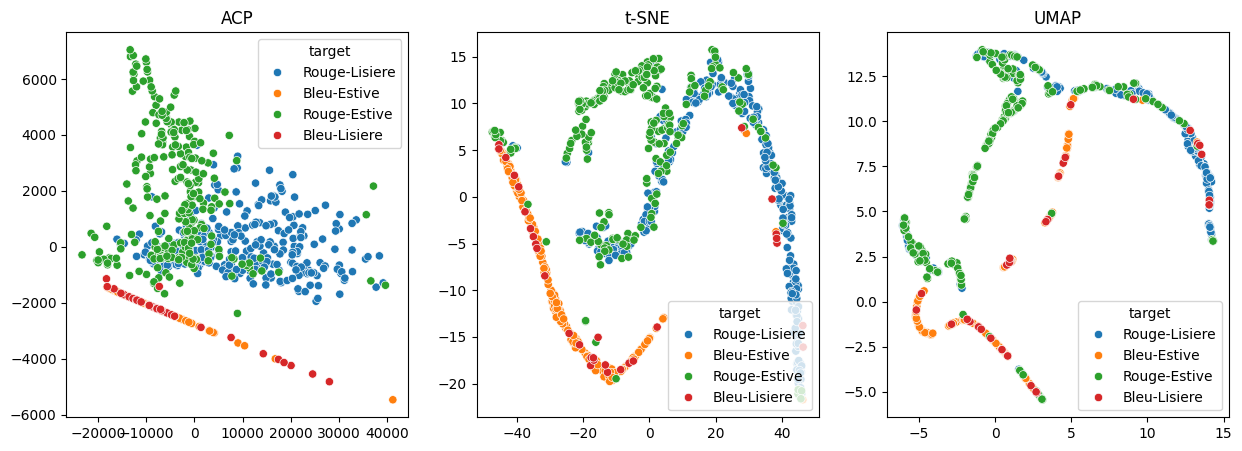

In [ ]:

# Remplacer les codes par les noms correspondants
df['target'] = df['target'].map(dy_po)

# ACP (Analyse en Composantes Principales)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop('target', axis=1))

# t-SNE (t-distributed Stochastic Neighbor Embedding)
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df.drop('target', axis=1))

# UMAP (Uniform Manifold Approximation and Projection)
umap_result = umap.UMAP().fit_transform(df.drop('target', axis=1))

# Affichage des résultats
plt.figure(figsize=(15, 5))

# ACP
plt.subplot(1, 3, 1)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['target'])
plt.title('ACP')

# t-SNE
plt.subplot(1, 3, 2)
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df['target'])
plt.title('t-SNE')

# UMAP
plt.subplot(1, 3, 3)
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=df['target'])
plt.title('UMAP')

plt.savefig("/content/gdrive/MyDrive/Valeurs acoustiques/2022/Antras_Isard/Colored_acoustic_indices_acp_tsne_umap_L_E_B_R.png")
plt.show()

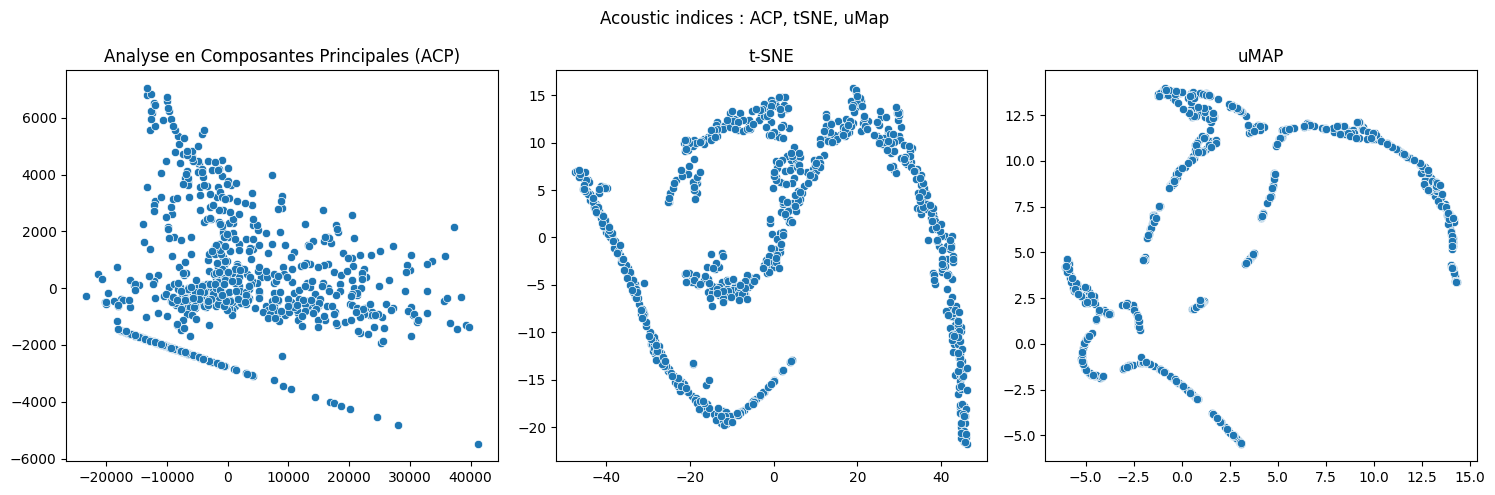

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer un tracé avec 3 sous-tracés (subplots)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Affichage des résultats de l'ACP sur le premier subplot
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], ax=axes[0])
axes[0].set_title('Analyse en Composantes Principales (ACP)')

# Affichage des résultats de t-SNE sur le deuxième subplot
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], ax=axes[1])
axes[1].set_title('t-SNE')

# Affichage des résultats de uMAP sur le troisième subplot
sns.scatterplot(x=umap_result[:,0], y=umap_result[:,1], ax=axes[2])
axes[2].set_title('uMAP')

# Ajouter un titre global au tracé
plt.suptitle('Acoustic indices : ACP, tSNE, uMap')

# Afficher le tracé avec les sous-tracés
plt.tight_layout()
plt.savefig("/content/gdrive/MyDrive/Valeurs acoustiques/2022/Antras_Isard/acoustic_indices_acp_tsne_umap_L_E_B_R.png")
plt.show()